In [79]:
import pandas as pd
import numpy as np

from sklearn import metrics
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split

from news_vec.corpus import Corpus

In [21]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import altair as alt
import seaborn as sns

mpl.style.use('seaborn-muted')
sns.set(style="whitegrid")

alt.data_transformers.enable('default', max_rows=None)

DataTransformerRegistry.enable('default')

In [6]:
c = Corpus('../data/clf-articles.json/')

2019-01-24 04:31:39,796 | INFO : Reading headlines.
1085868it [00:18, 57339.61it/s]


In [7]:
df = c.sample_ava_ts_deciles()

In [96]:
df0 = df[df.label.isin(['npr.org.0', 'dailykos.com.0'])]
df9 = df[df.label.isin(['npr.org.9', 'dailykos.com.9'])]

In [150]:
X_train, X_test, y_train, y_test = train_test_split(df0.clf_tokens, df0.label)
test_df = pd.DataFrame(X_test)

In [151]:
clf = LinearSVC()

tv = TfidfVectorizer(
    analyzer='word',
    tokenizer=lambda x: x,
    preprocessor=lambda x: x,
    ngram_range=(1,3),
    token_pattern=None,
)

X_train = tv.fit_transform(X_train)
X_test = tv.transform(X_test)

fit = clf.fit(X_train, y_train)

y_test_pred = fit.predict(X_test)

In [152]:
metrics.accuracy_score(y_test, y_test_pred)

0.7768526228143214

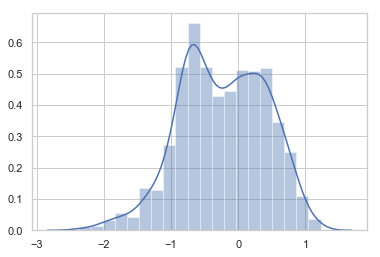

In [153]:
sns.distplot(fit.decision_function(X_test))

In [154]:
test_df['pred'] = fit.decision_function(X_test)
test_df['pred_abs'] = abs(test_df.pred)
test_df['y'] = np.random.random(len(test_df))
test_df['tip'] = test_df.clf_tokens.apply(lambda ts: ' '.join(ts))
test_df = test_df.reset_index()

In [155]:
fit.classes_

array(['dailykos.com.0', 'npr.org.0'], dtype=object)

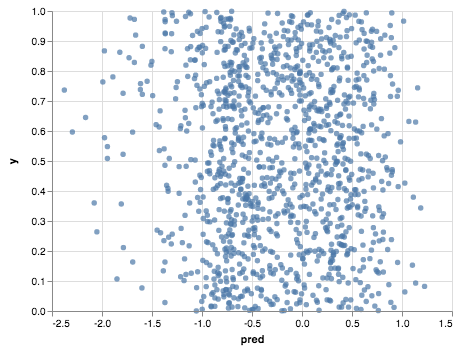

In [156]:
alt.Chart(test_df).mark_circle().encode(x='pred', y='y', tooltip='tip')

In [157]:
len(test_df[(test_df.domain=='dailykos.com')&(test_df.pred>0)])

60

In [158]:
len(test_df[(test_df.domain=='npr.org')&(test_df.pred<0)])

208